# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [115]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [117]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

uint8 uint8
5
31
1
5
34


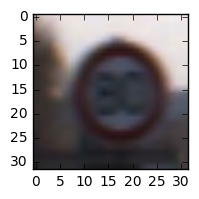

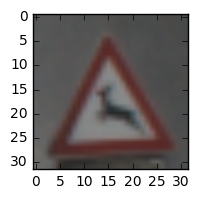

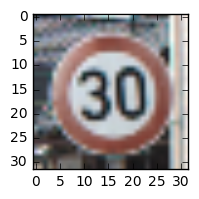

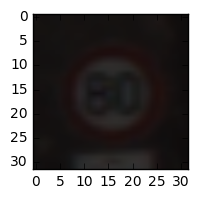

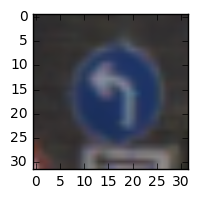

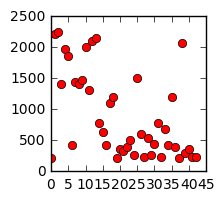

In [120]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

print(X_train.dtype, y_train.dtype)

def view_random(X, y, n):
    for i in random.sample(range(n), 5):
        image = X[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image)
        print(y[i])
        
view_random(X_train, y_train, n_train)
labels, counts = np.unique(y_train, return_counts=True)
#print(labels, counts)
plt.figure(figsize=(2,2))
plt.plot(labels, counts, 'ro')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [119]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def convert_to_grayscale(x):
    return np.mean(x, axis=3, keepdims=True) # convert to grayscale

min_intensity = np.min(X_train)
max_intensity = np.max(X_train)

def scale(x):
    return (x - min_intensity) / (max_intensity - min_intensity)

def preprocess(x):
    return scale(convert_to_grayscale(x))

X_train_pp = preprocess(X_train)
X_test_pp = preprocess(X_test)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Train and test images were converted to gray scale. On observation of samples in train data, there doesn't seem to be any traffic sign shapes which differ only in color.

Train and test images were also scaled according to min-max intensity in train data so that all samples have pixels in range 0-1

In [121]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import resample, shuffle
from sklearn.cross_validation import train_test_split

X_train_pp, y_train = shuffle(X_train_pp, y_train)
X_train_pp, X_valid_pp, y_train, y_valid = train_test_split(X_train_pp, y_train, test_size = 0.2, random_state = 99)

def resample(X, y, min_samples_per_class):
    labels = np.unique(y)
    
    X_resampled = []
    y_resampled = []
    
    for i in range(0, len(labels)):
        Xi = X[y==labels[i]]
        yi = y[y==labels[i]]
        if len(yi) < min_samples_per_class:
            sample = np.random.choice(len(Xi), size=min_samples_per_class, replace=True)
            Xi = Xi[sample]
            yi = yi[sample]
        X_resampled.append(Xi)
        y_resampled.append(yi)
    return np.concatenate(X_resampled), np.concatenate(y_resampled)

X_train_pp, y_train = resample(X_train_pp, y_train, 1200)

print(len(X_train_pp))

print(X_train_pp.dtype, X_valid_pp.dtype, y_train.dtype, y_valid.dtype)

55377
float64 float64 uint8 uint8


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Training data was split into training and validation data in 4:1 ratio. Since test data is already present separately, I did not split training further into test data
Resampled all classes as the data was imbalanced wrt classes. Min Sample size for each class = 1200

In [122]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W = tf.Variable(tf.truncated_normal((5,5,1,6), mean=mu, stddev=sigma))
    B = tf.Variable(tf.zeros(6))
    out = tf.nn.conv2d(x, W, [1, 1, 1, 1], 'VALID') + B

    # TODO: Activation.
    out = tf.nn.relu(out)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    out = tf.nn.max_pool(out, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W = tf.Variable(tf.truncated_normal((5,5,6, 16), mean=mu, stddev=sigma))
    B = tf.Variable(tf.zeros(16))
    out = tf.nn.conv2d(out, W, [1, 1, 1, 1], 'VALID') + B
    
    # TODO: Activation.
    out = tf.nn.relu(out)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    out = tf.nn.max_pool(out, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    out = flatten(out)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    B = tf.Variable(tf.zeros(120))
    out = tf.matmul(out, W) + B
    
    # TODO: Activation.
    out = tf.nn.relu(out)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    B = tf.Variable(tf.zeros(84))
    out = tf.matmul(out, W) + B
    
    # TODO: Activation.
    out = tf.nn.relu(out)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))
    B = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(out, W) + B
    
    return logits


In [123]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.uint8, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I have used a standard LeNet architecture.

In [124]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [125]:
# Evaluation
prediction_operation = tf.argmax(logits, 1)
top_k_prediction = tf.nn.top_k(tf.nn.softmax(logits), k = 5)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def predict(X_data):
    sess = tf.get_default_session()
    pred = sess.run(prediction_operation, feed_dict = {x : X_data})
    return pred

def predict_top_5(X_data):
    sess = tf.get_default_session()
    pred = sess.run(top_k_prediction, feed_dict = {x : X_data})
    return pred

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size].astype(np.float32), y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [127]:
# Training
def get_validation_accuracy(num_epochs, batch_size, X_train_pp, y_train):
    validation_accuracy = 0
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        num_examples = len(X_train_pp)
    
        print("Training... epochs = {}, batch_size = {}".format(num_epochs, batch_size))
        for i in range(num_epochs):
            X_train_pp, y_train = shuffle(X_train_pp, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train_pp[offset:end].astype(np.float32), y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            validation_accuracy = evaluate(X_valid_pp, y_valid, batch_size)
            #print("EPOCH {} ...".format(i+1))
            #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        saver.save(sess, 'tsc-{}-{}'.format(num_epochs, batch_size))
        print("Model saved")
    return validation_accuracy


In [81]:
# get hyperparameters
epochs = [15, 20]
batch_sizes = [64, 128]

ideal_batch_size = 0
ideal_epochs = 0
best_accuracy = 0
for e in epochs:
    for b in batch_sizes:
        va = get_validation_accuracy(e, b, X_train_pp, y_train)
        if va > best_accuracy:
            ideal_batch_size = b
            ideal_epochs = e
        print(e, b, va)


Training... epochs = 10, batch_size = 32
Model saved
10 32 0.973093598572
Training... epochs = 10, batch_size = 64
Model saved
10 64 0.982147411375
Training... epochs = 10, batch_size = 128
Model saved
10 128 0.963912267157
Training... epochs = 15, batch_size = 32
Model saved
15 32 0.97895944912
Training... epochs = 15, batch_size = 64
Model saved
15 64 0.974623820332
Training... epochs = 15, batch_size = 128
Model saved
15 128 0.974623820454
Training... epochs = 20, batch_size = 32
Model saved
20 32 0.980489671002
Training... epochs = 20, batch_size = 64
Model saved
20 64 0.988268298903
Training... epochs = 20, batch_size = 128
Model saved
20 128 0.980234634022


In [82]:
# Test data accuracy
with tf.Session() as sess:
    saver.restore(sess, 'tsc-{}-{}'.format(ideal_epochs, ideal_batch_size))
    test_accuracy = evaluate(X_test_pp, y_test, ideal_batch_size)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.914


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Tried various combinations of batch size and epochs. Selected the combination giving best validation accuracy.
Adam optimizer was used. Initially I tried epochs of sizes:[1,5, 10, 15, 20] and batch sizes of (32, 64, 128, 256, 512) as well but they were giving worse performances, hence for later training runs I selected fewer combinations.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I tried LeNet architecture first of all, without any resampled data and got around 97% validation accuracy
Secondly, I tried resampling training data to make classes more balanced and then tried same LeNet architecture. Validation accuracy = 98-99%

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

roadwork.jpg
stop.jpg
animalcrossing.jpg
doublecurve.jpg
elephantcrossing.jpg
70kmph_1.jpg
pedestrian.jpg
trafficsignal.jpg


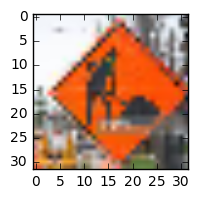

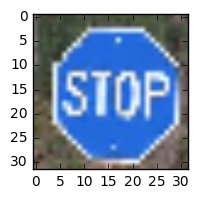

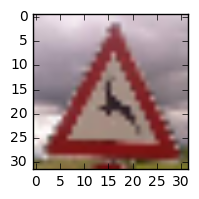

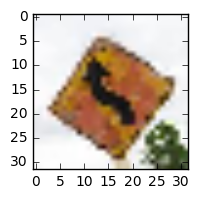

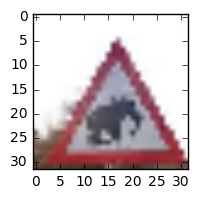

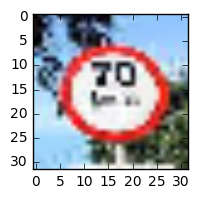

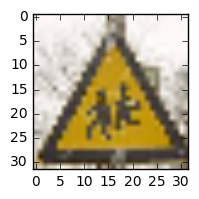

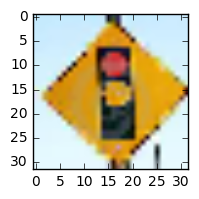

In [103]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image
Web_images = os.listdir('../web_images')
Web_test = [[np.array(Image.open(os.path.join('../web_images', f)).resize((32, 32)))] for f in Web_images]
Web_test = np.concatenate(Web_test)
# display images
for i in range(0, len(Web_test)):
    image = Web_test[i].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    print(Web_images[i])


In [104]:
Web_test = preprocess(Web_test)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Selected images are shown above. The images may have a different angle of view than the training data. Different colors in traffic sign (like black) may result in more pronounced edges in these images which would make them different from train data. Font size in 70kmph sign is smaller compared to whole sign and it also has 'kmph' included.


In [105]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'tsc-{}-{}'.format(ideal_epochs, ideal_batch_size))
    pred = predict(Web_test)
    print(pred)
print(Web_images)


[10 14 31 10 30 40 29 33]
['roadwork.jpg', 'stop.jpg', 'animalcrossing.jpg', 'doublecurve.jpg', 'elephantcrossing.jpg', '70kmph_1.jpg', 'pedestrian.jpg', 'trafficsignal.jpg']


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Not so well. Accuracy = 2/8 ~ 25%

In [106]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'tsc-{}-{}'.format(ideal_epochs, ideal_batch_size))
    pred_top_5 = predict_top_5(Web_test)
    print(pred_top_5)
print(Web_images)

TopKV2(values=array([[  9.99997854e-01,   1.55376358e-06,   3.34769794e-07,
          1.77397894e-07,   7.14395156e-08],
       [  9.51872885e-01,   4.75213900e-02,   6.00718660e-04,
          2.14411716e-06,   1.70732437e-06],
       [  9.99941349e-01,   5.75697304e-05,   1.01998717e-06,
          1.09054235e-17,   7.87809982e-20],
       [  9.99969363e-01,   1.99835777e-05,   7.07149957e-06,
          1.87089847e-06,   1.67710732e-06],
       [  9.99857664e-01,   1.40598873e-04,   1.09591065e-06,
          5.41902352e-07,   2.63643987e-08],
       [  9.99560177e-01,   3.26857582e-04,   5.89357587e-05,
          5.39317334e-05,   4.64672105e-08],
       [  9.99886751e-01,   1.12310328e-04,   7.24243932e-07,
          1.53649211e-07,   1.31505388e-07],
       [  9.89625633e-01,   1.03584854e-02,   1.57642608e-05,
          4.01617477e-08,   2.74364531e-08]], dtype=float32), indices=array([[10,  2, 21, 40, 33],
       [14,  1, 38, 33,  4],
       [31, 21, 11, 24, 30],
       [10,  2, 21

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model is quite confident (>95%) in all of its 8 predictions, but correctly predicted only 2 cases.
For incorrect cases, correct prediction appears twice in top 5.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.